# What is Trip Advisor


* Tripadvisor is a popular online platform that provides user-generated reviews, photos, and ratings for various travel-related services, including hotels, restaurants, attractions, and experiences. It is widely used by travelers to research and plan their trips, as it offers insights and recommendations based on the experiences of millions of users worldwide.



* Key Features of Tripadvisor:

* User Reviews and Ratings: Travelers can read and write reviews for hotels, restaurants, attractions, and other travel-related services. These reviews often include detailed experiences, ratings, and photos.


* Travel Forums: The platform hosts discussion forums where users can ask questions and share advice on various travel topics.


* Booking Services: Tripadvisor also provides booking options for hotels, flights, restaurants, and vacation rentals through partnerships with various travel service providers.


* Travel Guides: The platform offers travel guides and articles to help users plan their trips, with recommendations for activities, dining, and accommodations.


* Traveler Photos and Videos: Users can upload their own photos and videos to give a visual representation of the places they’ve visited, which can help others make informed decisions.


* Ranking and Awards: Tripadvisor ranks hotels, restaurants, and attractions based on user reviews and awards top-rated places with accolades like the "Travelers' Choice" award.

# Before create the project purpose, We need to get ML Canvas on these project to get the right directions : 


Purpose : 

* Predict Review Rating

* Topic Modeling on Reviews

* Explore key aspects that make hotels good or bad



ML Canvas :


* Background

* Value proposition

* Objectives

* Solution

* Feasibility

* Data

* Metric

* Evaluation

* Modelling

* Inference

* Feedback

# Why i used runtime %%time ?

* I used %%time to measure the execution time of the code, helping me evaluate how fast the training or processing completes

# Read file

In [1]:
%%time

import pandas as pd

data = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')

CPU times: user 634 ms, sys: 75.2 ms, total: 709 ms
Wall time: 848 ms


In [2]:
%%time

data.head()

CPU times: user 146 µs, sys: 0 ns, total: 146 µs
Wall time: 150 µs


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


# Preprocessing Text

In [3]:
%%time

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
CPU times: user 970 ms, sys: 164 ms, total: 1.13 s
Wall time: 1.65 s


True

In [4]:
%%time

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [5]:
%%time

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 18.4 µs


In [6]:
%%time

# Define stopwords and punctuation to remove
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

CPU times: user 1.62 ms, sys: 936 µs, total: 2.55 ms
Wall time: 2.68 ms


In [7]:
%%time

import re

# Combined function to clean and preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove punctuation and stop words, and lemmatize the words
    cleaned_words = [
        lemmatizer.lemmatize(word) 
        for word in words 
        if word not in stop_words and word not in punctuation
    ]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 9.78 µs


In [8]:
%%time

data['cleaned_review'] = data['Review'].apply(preprocess_text)

CPU times: user 36.4 s, sys: 134 ms, total: 36.6 s
Wall time: 36.6 s


In [9]:
%%time

# Display for the 20 rows
data[['cleaned_review']].head(20)

CPU times: user 1.79 ms, sys: 995 µs, total: 2.79 ms
Wall time: 6.43 ms


,cleaned_review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice room experience hotel monaco seattle good...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...
6,cozy stay rainy city husband spent night monac...
7,excellent staff housekeeping quality hotel cho...
8,hotel stayed hotel monaco cruise room generous...
9,excellent stayed hotel monaco past delight rec...


# Text Analysis : 

* Keyword Extraction: Identify frequently mentioned words or phrases that are related to key aspects of hotel experiences.

In [10]:
%%time

from collections import Counter

# Tokenize the cleaned reviews into words
all_words = ' '.join(data['cleaned_review']).split()

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Convert to a DataFrame for easier visualization
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

common_words_df

CPU times: user 411 ms, sys: 68 ms, total: 479 ms
Wall time: 476 ms


,Word,Frequency
0,hotel,52957
1,room,46378
2,great,21098
3,nt,19007
4,good,17054
5,staff,16280
6,stay,15341
7,night,14084
8,day,12961
9,time,12611


* Sentiment analysis using a library like TextBlob or VADER

In [11]:
%%time

from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the cleaned reviews
data['sentiment'] = data['cleaned_review'].apply(get_sentiment)

# Display the first few rows to show sentiment scores
data[['cleaned_review', 'sentiment']].head()

CPU times: user 17.8 s, sys: 6.96 ms, total: 17.8 s
Wall time: 17.8 s


,cleaned_review,sentiment
0,nice hotel expensive parking got good deal sta...,0.208744
1,ok nothing special charge diamond member hilto...,0.248633
2,nice room experience hotel monaco seattle good...,0.294420
3,unique great stay wonderful time hotel monaco ...,0.504825
4,great stay great stay went seahawk game awesom...,0.469643


*  Word Cloud 

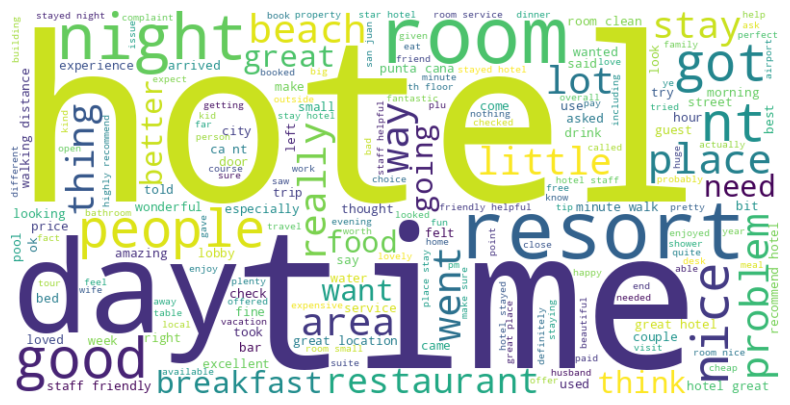

CPU times: user 17.5 s, sys: 812 ms, total: 18.3 s
Wall time: 18 s


In [12]:
%%time

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned reviews into a single string
all_reviews = ' '.join(data['cleaned_review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TF-IDF Analysis

*  Identify important words in each review

In [13]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_review'])

# Convert the TF-IDF matrix to a dataframe for easy viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()

CPU times: user 2.38 s, sys: 169 ms, total: 2.55 s
Wall time: 2.56 s


,able,absolutely,ac,access,accommodation,activity,actually,add,added,additional,...,worry,worse,worst,worth,write,wrong,year,yes,york,young
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.089467,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.082479,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling (LDA): 

* Use Latent Dirichlet Allocation (LDA) to discover hidden topics within the reviews. ✔️

In [14]:
%%time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the cleaned text data into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['cleaned_review'])

# Initialize LDA with a reasonable number of topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Get the top words for each topic
n_top_words = 10
words = vectorizer.get_feature_names_out()
topics = {}

for topic_idx, topic in enumerate(lda.components_):
    topics[f"Topic {topic_idx+1}"] = [words[i] for i in topic.argsort()[-n_top_words:]]

# Convert topics to dataFrame
topics_df = pd.DataFrame(topics)

topics_df

CPU times: user 2min 17s, sys: 22.8 ms, total: 2min 17s
Wall time: 2min 17s


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,wedding,good,breakfast,pool,time
1,night,nice,night,great,told
2,time,pool,nt,good,night
3,place,stay,stay,time,nt
4,day,service,staff,day,desk
5,room,view,good,food,service
6,pool,restaurant,location,nt,staff
7,hotel,great,great,beach,stay
8,staff,room,room,resort,room
9,great,hotel,hotel,room,hotel


# Text to Numeric Conversion:

* Convert the text reviews into numeric features using TF-IDF.

* Explore converting the text into word embeddings using a pre-trained model.

In [15]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features to keep it manageable
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_review'])

CPU times: user 2.44 s, sys: 6 ms, total: 2.45 s
Wall time: 2.45 s


# Pre-trained Word Embeddings

* Convert Reviews to Word Embeddings

Average the word vectors for each word in a review to get a fixed-size representation of each review.

In [16]:
%%time

!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 40.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shape

In [17]:
%%time

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the text data
data['tokenized_review'] = data['cleaned_review'].apply(word_tokenize)

CPU times: user 29.3 s, sys: 421 ms, total: 29.7 s
Wall time: 30.6 s


* Train a Word2Vec model using the tokenized reviews

In [18]:
%%time

from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=data['tokenized_review'], vector_size=100, window=5, min_count=2, workers=4)

CPU times: user 29.5 s, sys: 173 ms, total: 29.7 s
Wall time: 8.61 s


In [19]:
%%time

# Access word vectors
word_vectors = word2vec_model.wv

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


* Find words similar to a given word

In [20]:
%%time

similar_words = word_vectors.most_similar('hotel', topn=10)
print(similar_words)

[('property', 0.6153094172477722), ('hotelthe', 0.575443685054779), ('amsterdam', 0.5741686224937439), ('seattle', 0.5715281963348389), ('boston', 0.5597099661827087), ('accommodation', 0.558724045753479), ('midtown', 0.5439982414245605), ('nyc', 0.5420454740524292), ('marriott', 0.5311047434806824), ('radisson', 0.529858410358429)]
CPU times: user 7.9 ms, sys: 8.03 ms, total: 15.9 ms
Wall time: 9.64 ms


* Generate vectors for each review by averaging the word vectors for all words in a review

In [21]:
%%time

import numpy as np

# Function to get the average word vector for a review
def get_review_vector(review, model):
    word_vectors = [model[word] for word in review if word in model]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply the function to the 'tokenized_review' column
data['review_vector'] = data['tokenized_review'].apply(lambda x: get_review_vector(x, word_vectors))

data[['review_vector']].head()

CPU times: user 6.93 s, sys: 174 ms, total: 7.1 s
Wall time: 6.79 s


,review_vector
0,"[0.40150362, -0.11507784, 0.67199665, 0.307757..."
1,"[0.086604536, -0.026108602, 0.07426157, 0.1663..."
2,"[0.2504689, -0.35114846, 0.23675893, 0.1056942..."
3,"[0.35428798, -0.14802518, 0.61862874, -0.03798..."
4,"[0.037803058, 0.09950101, 0.23077303, 0.310762..."


* Similarity Analysis

In [22]:
%%time

from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between the first two reviews
similarity = cosine_similarity([data['review_vector'].iloc[0]], [data['review_vector'].iloc[1]])
print(similarity)

[[0.8042482]]
CPU times: user 1.28 ms, sys: 0 ns, total: 1.28 ms
Wall time: 1.22 ms


* Save and Load the Word2Vec Model

In [23]:
%%time

# Save the model

word2vec_model.save("word2vec_hotel_reviews.model")

CPU times: user 21.6 ms, sys: 26 ms, total: 47.6 ms
Wall time: 47 ms


In [24]:
%%time

# load the model 
loaded_model = Word2Vec.load("word2vec_hotel_reviews.model")

CPU times: user 373 ms, sys: 11 ms, total: 384 ms
Wall time: 384 ms


# K-Means Clustering: 

* Group reviews into clusters and analyze the common themes in each cluster.

In [25]:
%%time

from sklearn.cluster import KMeans

# Perform K-Means clustering on the review vectors
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(list(data['review_vector']))

# Analyze the reviews in each cluster
for i in range(5):
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i]['cleaned_review'].head())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79d797538670>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._nam

Cluster 0:
9     excellent stayed hotel monaco past delight rec...
10    poor value stayed monaco seattle july nice hot...
14    great hotel night quick business trip loved li...
18    good choice hotel recommended sister great loc...
21    excellent stay delightful surprise stay monaco...
Name: cleaned_review, dtype: object
Cluster 1:
1    ok nothing special charge diamond member hilto...
2    nice room experience hotel monaco seattle good...
4    great stay great stay went seahawk game awesom...
5    love monaco staff husband stayed hotel crazy w...
7    excellent staff housekeeping quality hotel cho...
Name: cleaned_review, dtype: object
Cluster 2:
0     nice hotel expensive parking got good deal sta...
3     unique great stay wonderful time hotel monaco ...
6     cozy stay rainy city husband spent night monac...
8     hotel stayed hotel monaco cruise room generous...
11    nice value seattle stayed night late looked co...
Name: cleaned_review, dtype: object
Cluster 3:
117    best b

# Predict Review Rating ✔️

In [26]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# The target sentiment label (e.g., 1-2 = negative, 4-5 = positive)
data['sentiment'] = data['Rating'].apply(lambda x: 1 if x > 3 else 0)

# Prepare data
X = np.array(data['review_vector'].tolist())
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.869236399121737
CPU times: user 17.3 s, sys: 6.11 ms, total: 17.3 s
Wall time: 17.3 s


* Sentiment analysis model correctly predicted the sentiment of approximately 86.92% of the reviews in test dataset . metric score 86.92% is good.

#  Review Similarity Search

In [27]:
%%time

from sklearn.metrics.pairwise import cosine_similarity

# Find the most similar review to the first one
similarities = cosine_similarity([data['review_vector'].iloc[0]], data['review_vector'].tolist())
most_similar_index = similarities[0].argsort()[-2]  # -2 because the most similar will be itself

print("Original Review:")
print(data['cleaned_review'].iloc[0])
print("\nMost Similar Review:")
print(data['cleaned_review'].iloc[most_similar_index])

Original Review:
nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night

Most Similar Review:
great hotel husband stayed night early augustwe given room rd floor great view east river empire state chrysler buildingsthe room huge king size bed large walkin wardrobe sofa lounge large windowthe room clean tidy modern furnishing bathroom little tired renovated point bathroom little mouldy nothing badthe location little way nt mind walking nt bother block central station great catching subwaythe view magnificant

# Save The Model

In [28]:
%%time

import joblib

# Save the model
joblib.dump(clf, 'sentiment_classifier.pkl')

CPU times: user 233 ms, sys: 235 ms, total: 468 ms
Wall time: 146 ms


['sentiment_classifier.pkl']

# Confusion Matrix

* Provides a detailed breakdown of correct and incorrect classifications.

* Shows true positives, true negatives, false positives, and false negatives.

In [29]:
%%time

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.83      0.62      0.71      1057
    Positive       0.88      0.96      0.92      3042

    accuracy                           0.87      4099
   macro avg       0.85      0.79      0.81      4099
weighted avg       0.87      0.87      0.86      4099

CPU times: user 10.7 ms, sys: 3 ms, total: 13.7 ms
Wall time: 12.6 ms


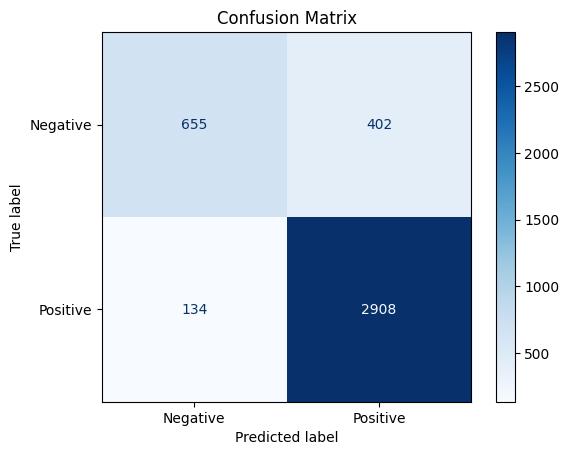

CPU times: user 378 ms, sys: 161 ms, total: 539 ms
Wall time: 276 ms


In [30]:
%%time

# Display confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Here the explaination result confusion metrics : 

* True Negative (Top-Left: 655):

655 instances where the model correctly predicted the negative sentiment.
These are cases where the actual sentiment was negative, and the model also predicted it as negative.



* False Positive (Top-Right: 402):


402 instances where the model incorrectly predicted positive sentiment for reviews that were actually negative.
These are cases where the actual sentiment was negative, but the model predicted it as positive.



* False Negative (Bottom-Left: 134):


134 instances where the model incorrectly predicted negative sentiment for reviews that were actually positive.
These are cases where the actual sentiment was positive, but the model predicted it as negative.


* True Positive (Bottom-Right: 2908):


2908 instances where the model correctly predicted positive sentiment.
These are cases where the actual sentiment was positive, and the model also predicted it as positive.


* True Labels are on the Y-axis (vertical axis).
* Predicted Labels are on the X-axis (horizontal axis).

* True Positives (TP) and True Negatives (TN) are the correct predictions.
* False Positives (FP) and False Negatives (FN) are the incorrect predictions.

# Explore key aspects that make hotels good or bad ✔️

In [31]:
%%time

# Sentiment Analysis Predictions

positive_reviews = data[data['sentiment'] == 1]['cleaned_review']
negative_reviews = data[data['sentiment'] == 0]['cleaned_review']

CPU times: user 9.71 ms, sys: 995 µs, total: 10.7 ms
Wall time: 9.46 ms


In [32]:
%%time

# Use ratings (e.g., 4-5 stars as positive, 1-2 stars as negative)

positive_reviews = data[data['Rating'] > 3]['cleaned_review']
negative_reviews = data[data['Rating'] <= 3]['cleaned_review']

CPU times: user 7.06 ms, sys: 985 µs, total: 8.05 ms
Wall time: 7.33 ms


* The most common words or phrases in positive and negative reviews

* Word Frequency Analysis

In [33]:
%%time

from collections import Counter

# Combine all positive and negative reviews into single strings
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Tokenize the text
positive_words = word_tokenize(positive_text)
negative_words = word_tokenize(negative_text)

# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Display the most common words
print("Common words in positive reviews:")
print(positive_word_freq.most_common(10))

print("\nCommon words in negative reviews:")
print(negative_word_freq.most_common(10))

Common words in positive reviews:
[('hotel', 38939), ('room', 30639), ('great', 18115), ('staff', 12538), ('good', 12474), ('nt', 12379), ('stay', 11294), ('night', 9623), ('nice', 9245), ('time', 8916)]

Common words in negative reviews:
[('room', 15739), ('hotel', 14018), ('nt', 6628), ('good', 4580), ('night', 4461), ('day', 4247), ('stay', 4047), ('staff', 3742), ('time', 3695), ('service', 3344)]
CPU times: user 18 s, sys: 76.2 ms, total: 18.1 s
Wall time: 18.1 s


* Word Cloud

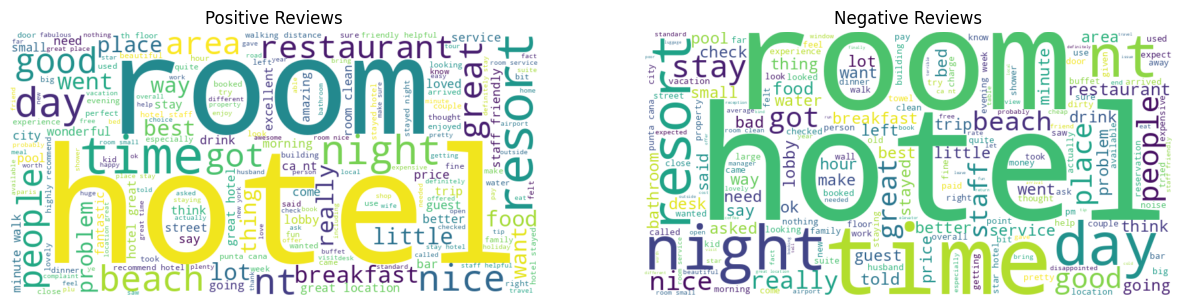

CPU times: user 19.5 s, sys: 691 ms, total: 20.2 s
Wall time: 19.9 s


In [34]:
%%time

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Positive Reviews")
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative Reviews")
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

* Topic Modeling To Positive Reviews

In [35]:
%%time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
positive_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
positive_matrix = positive_vectorizer.fit_transform(positive_reviews)

# Apply LDA
lda_positive = LatentDirichletAllocation(n_components=5, random_state=42)
lda_positive.fit(positive_matrix)

# Display topics
positive_topics = lda_positive.components_
positive_feature_names = positive_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(positive_topics):
    print(f"Positive Topic {topic_idx}:")
    print(" ".join([positive_feature_names[i] for i in topic.argsort()[:-11:-1]]))

Positive Topic 0:
hotel staff stay room service great stayed place wonderful best
Positive Topic 1:
beach resort great nt room pool food time good day
Positive Topic 2:
room hotel great stay nice bed night nt staff location
Positive Topic 3:
hotel room great location staff stay good clean breakfast stayed
Positive Topic 4:
hotel room good nt breakfast day night walk area minute
CPU times: user 1min 55s, sys: 20.6 ms, total: 1min 55s
Wall time: 1min 55s


* Topic Modeling To Negative Reviews

In [36]:
%%time

# Vectorize the text
negative_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
negative_matrix = negative_vectorizer.fit_transform(negative_reviews)

# Apply LDA
lda_negative = LatentDirichletAllocation(n_components=5, random_state=42)
lda_negative.fit(negative_matrix)

# Display topics
negative_topics = lda_negative.components_
negative_feature_names = negative_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(negative_topics):
    print(f"Negative Topic {topic_idx}:")
    print(" ".join([negative_feature_names[i] for i in topic.argsort()[:-11:-1]]))

Negative Topic 0:
resort beach food nt day pool room good time restaurant
Negative Topic 1:
hotel room stay nt night staff day booked service stayed
Negative Topic 2:
room service hotel told desk day time staff nt asked
Negative Topic 3:
room hotel nt night bed stay floor door bathroom like
Negative Topic 4:
hotel room good location great breakfast nice night staff clean
CPU times: user 39.7 s, sys: 8.85 ms, total: 39.8 s
Wall time: 39.8 s


* Focus on specific hotel features (like "room", "service", "location", etc.) and analyze the sentiment associated with each feature

In [37]:
%%time

# Define features to analyze
features = ['room', 'service', 'location', 'staff', 'price', 'food', 'condition', 'environment']

for feature in features:
    # Extract sentences mentioning the feature
    feature_positive = [review for review in positive_reviews if feature in review]
    feature_negative = [review for review in negative_reviews if feature in review]
    
    # Analyze sentiment
    print(f"\nFeature: {feature}")
    print(f"Positive Mentions: {len(feature_positive)}")
    print(f"Negative Mentions: {len(feature_negative)}")


Feature: room
Positive Mentions: 12913
Negative Mentions: 4834

Feature: service
Positive Mentions: 4811
Negative Mentions: 1877

Feature: location
Positive Mentions: 6754
Negative Mentions: 1745

Feature: staff
Positive Mentions: 9322
Negative Mentions: 2593

Feature: price
Positive Mentions: 3554
Negative Mentions: 1442

Feature: food
Positive Mentions: 4232
Negative Mentions: 1574

Feature: condition
Positive Mentions: 842
Negative Mentions: 537

Feature: environment
Positive Mentions: 94
Negative Mentions: 28
CPU times: user 112 ms, sys: 1.01 ms, total: 113 ms
Wall time: 112 ms


From the result :


* Feature: room

Positive Mentions: 12913: The word "room" was mentioned 12,913 times in positive reviews.

Negative Mentions: 4834: The word "room" was mentioned 4,834 times in negative reviews.

Interpretation: "Room" is a highly discussed feature, with more positive mentions than negative. This suggests that many guests are generally satisfied with the rooms, but there are still a significant number of complaints.


* Feature: service

Positive Mentions: 4811: "Service" was mentioned 4,811 times in positive reviews.

Negative Mentions: 1877: "Service" was mentioned 1,877 times in negative reviews.

Interpretation: "Service" also tends to be discussed more positively, indicating that service quality is generally appreciated by guests. However, the number of negative mentions suggests that service issues are still a concern for a portion of guests.


* Feature: location

Positive Mentions: 6754: "Location" was mentioned 6,754 times in positive reviews.

Negative Mentions: 1745: "Location" was mentioned 1,745 times in negative reviews.

Interpretation: "Location" is a strong point for many hotels, as it has a higher number 
of positive mentions compared to negative ones. However, some guests find the location unsatisfactory, which could be due to factors like noise, accessibility, or surroundings.


* Feature: staff

Positive Mentions: 9322: "Staff" was mentioned 9,322 times in positive reviews.

Negative Mentions: 2593: "Staff" was mentioned 2,593 times in negative reviews.

Interpretation: The staff is generally a key factor in positive reviews, indicating that guests appreciate good service and interactions with hotel staff. However, a notable number of negative mentions suggest that staff-related issues can also detract from the guest experience.


* Feature: price

Positive Mentions: 3554: "Price" was mentioned 3,554 times in positive reviews.

Negative Mentions: 1442: "Price" was mentioned 1,442 times in negative reviews.

Interpretation: "Price" has more positive mentions, implying that guests often find the pricing to be reasonable or a good value. However, price-related complaints also exist, possibly related to perceptions of overpricing or lack of value for money.



* Feature: food

Positive Mentions: 4232: "Food" was mentioned 4,232 times in positive reviews.

Negative Mentions: 1574: "Food" was mentioned 1,574 times in negative reviews.

Interpretation: Food quality seems to be a positive aspect for many guests, but there are still significant numbers of negative mentions, indicating that food can be a point of dissatisfaction for some.


* Feature: condition

Positive Mentions: 842: "Condition" (likely referring to the condition of the facilities) was mentioned 842 times in positive reviews.

Negative Mentions: 537: "Condition" was mentioned 537 times in negative reviews.

Interpretation: The condition of the hotel is more often mentioned positively, but the relatively high proportion of negative mentions suggests that the condition of the hotel (e.g., outdated facilities, cleanliness) is a notable concern for some guests.



* Feature: environment

Positive Mentions: 94: "Environment" was mentioned 94 times in positive reviews.

Negative Mentions: 28: "Environment" was mentioned 28 times in negative reviews.

Interpretation: "Environment" is less frequently mentioned compared to other features, but when it is mentioned, it tends to be positive. This might refer to the ambiance, surrounding area, or eco-friendliness of the hotel.